# Unsupervised Learning
## Clustering

In [ ]:
from numpy.random import randn
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
from numpy import cos,sin,array
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis,euclidean
import numpy as np

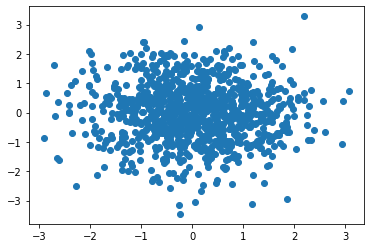

In [8]:
# Generate a blob of points randomly according to a normal distribution
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randn(1000,2)
plt.scatter(X[:,0],X[:,1])

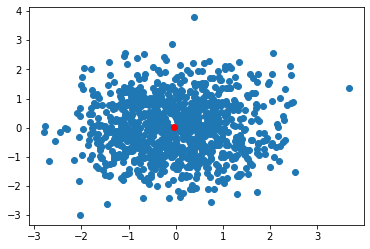

In [9]:
# Define Centroid
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randn(1000,2)
plt.scatter(X[:,0],X[:,1])
centroid = sum(X)/len(X)
plt.scatter(centroid[0],centroid[1],color='r')

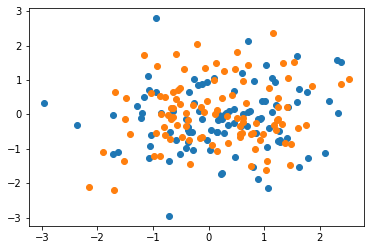

In [58]:
# Generate a second blob of points randomly according to a normal distribution
import numpy as np
import matplotlib.pyplot as plt
Y = np.random.randn(100,2)
plt.scatter(X[:,0],X[:,1])
plt.scatter(Y[:,0],Y[:,1])

(-10.0, 10.0)

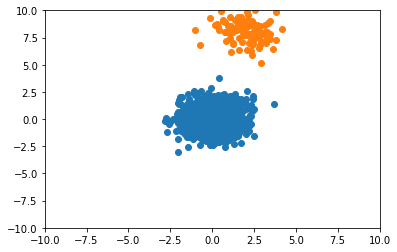

In [23]:
# Separate the two groups
import numpy as np
import matplotlib.pyplot as plt
Y = np.random.randn(100,2) + [2,8]
plt.scatter(X[:,0],X[:,1])
plt.scatter(Y[:,0],Y[:,1])
plt.xlim(-10,10)
plt.ylim(-10,10)

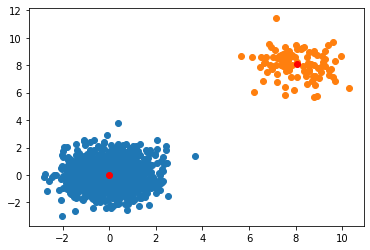

In [24]:
# Separate the two groups
import numpy as np
import matplotlib.pyplot as plt
Y = np.random.randn(100,2) + 8
plt.scatter(X[:,0],X[:,1])
plt.scatter(Y[:,0],Y[:,1])
centroid = sum(X)/len(X)
plt.scatter(centroid[0],centroid[1],color='r')
centroid = sum(Y)/len(Y)
plt.scatter(centroid[0],centroid[1],color='r')

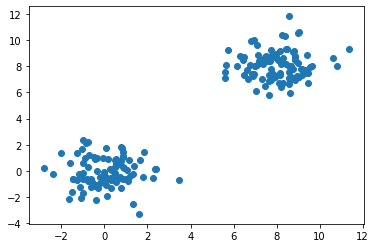

In [34]:
# What if you didn't know which group was which?
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randn(100,2)
Y = np.random.randn(100,2) + 8
X = np.concatenate([X,Y])
plt.scatter(X[:,0],X[:,1])

<AxesSubplot:xlabel='x', ylabel='y'>

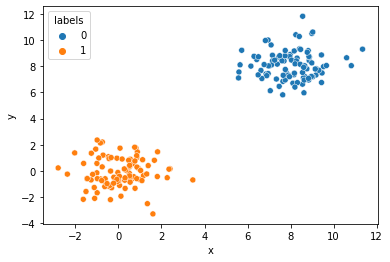

In [35]:
# Use a clustering algorithm
# TODO: code k-means for yourself without packages
from sklearn.cluster import KMeans
kmeans_instance = KMeans(n_clusters=2)

model = kmeans_instance.fit(X)

import pandas as pd
df = pd.concat([pd.DataFrame(X,columns=['x','y']),pd.DataFrame(model.labels_,columns=['labels'])],axis=1)

import seaborn as sns
sns.scatterplot(data=df,x='x',y='y',hue='labels')

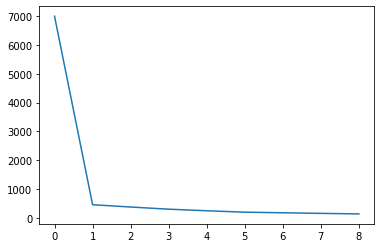

In [36]:
# How do we know how many clusters to input?

inertias = []
for i in range(1,10):
    kmeans_instance = KMeans(n_clusters=i)
    model = kmeans_instance.fit(X)
    inertias.append(model.inertia_)
plt.plot(range(1,10),inertias)

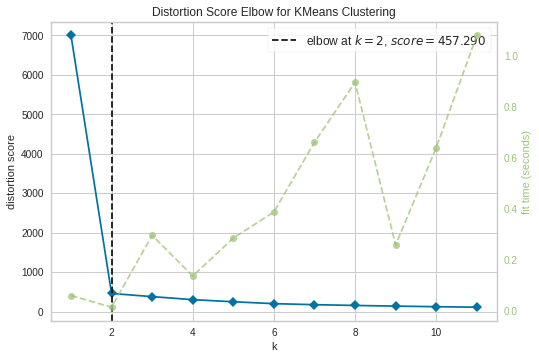

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from yellowbrick.cluster import KElbowVisualizer
kmeans_instance = KMeans()
visualizer = KElbowVisualizer(kmeans_instance, k=(1,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# 3 Clusters

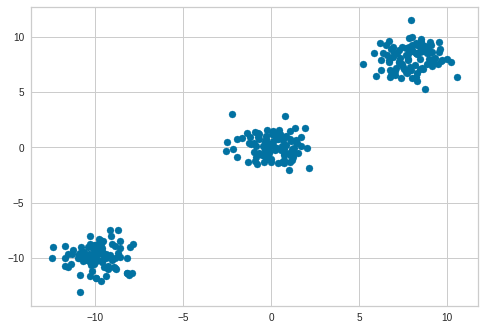

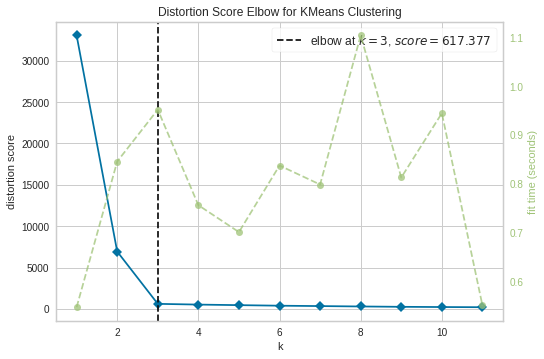

<AxesSubplot:xlabel='x', ylabel='y'>

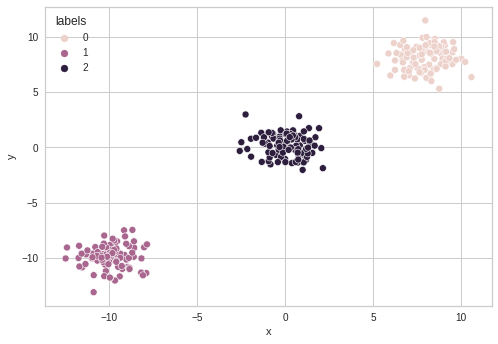

In [94]:
# What if you didn't know which group was which?
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randn(100,2)
Y = np.random.randn(100,2) + 8
Z = np.random.randn(100,2) - 10
X = np.concatenate([X,Y,Z])
plt.scatter(X[:,0],X[:,1])
plt.figure()
kmeans_instance = KMeans()
visualizer = KElbowVisualizer(kmeans_instance, k=(1,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
from sklearn.cluster import KMeans
kmeans_instance = KMeans(n_clusters=visualizer.elbow_value_)
model = kmeans_instance.fit(X)
import pandas as pd
df = pd.concat([pd.DataFrame(X,columns=['x','y']),pd.DataFrame(model.labels_,columns=['labels'])],axis=1)
import seaborn as sns
sns.scatterplot(data=df,x='x',y='y',hue='labels')

# 3 Dimensions

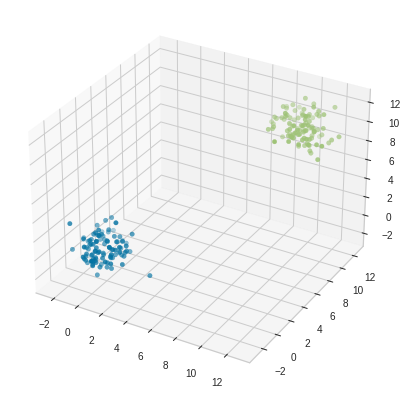

In [106]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
X = np.random.randn(100,3)
Y = np.random.randn(100,3) + 10

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.scatter(Y[:,0],Y[:,1],Y[:,2])

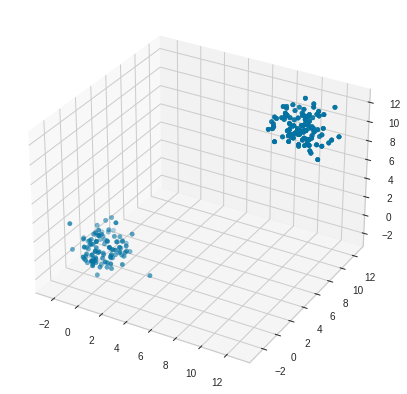

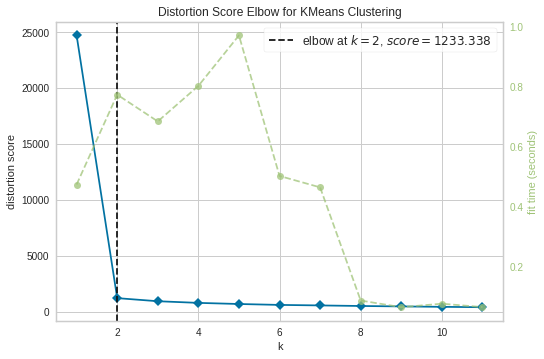

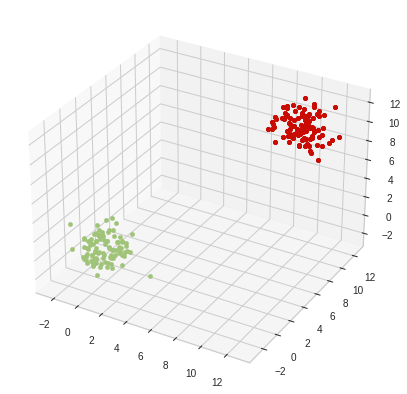

In [110]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
X = np.concatenate([X,Y])
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.figure()
kmeans_instance = KMeans()
visualizer = KElbowVisualizer(kmeans_instance, k=(1,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
from sklearn.cluster import KMeans
kmeans_instance = KMeans(n_clusters=visualizer.elbow_value_)
model = kmeans_instance.fit(X)
import pandas as pd
df = pd.concat([pd.DataFrame(X,columns=['x','y','z']),pd.DataFrame(model.labels_,columns=['labels'])],axis=1)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
for row in df.iloc:
    if(row.labels == 0):
        ax.scatter(row.x,row.y,row.z,color='r')
    elif(row.labels==1):
        ax.scatter(row.x,row.y,row.z,color='g')
    elif(row.labels==2):
        ax.scatter(row.x,row.y,row.z,color='b')


# Where K-Means fails

In [141]:
def scatter_plot(*args):
    plt.figure(figsize=(7.2,4.45),dpi=100)
    for arg in args:
        plt.scatter(arg[:,0],arg[:,1])
    # xlim = 10
    # ylim = 10
    # plt.xlim((-xlim,xlim))
    # plt.ylim((-ylim,ylim))
def multivariate_normal_andrew(var_x=1,var_y=1,cov=0,theta=0,mean=[0,0],size=100):
    from numpy import cos,sin,array
    R = array([[cos(theta),-sin(theta)],
        [sin(theta),cos(theta)]])
    cov_mat = array([[var_x,cov],[cov,var_y]])
    cov_mat = R @ cov_mat @ R.T
    X = multivariate_normal(mean=mean,cov=cov_mat,size=size)
    return X

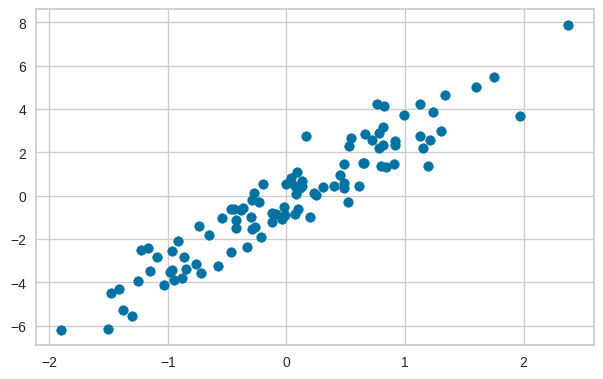

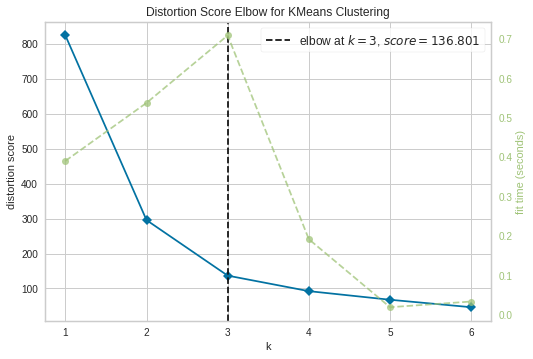

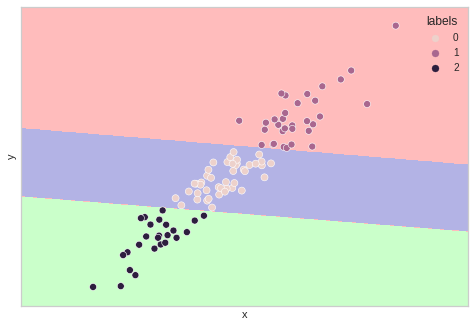

In [134]:
X = multivariate_normal_andrew(1,10,3,0,[0,0],100)
plt.figure()
kmeans_instance = KMeans()
visualizer = KElbowVisualizer(kmeans_instance, k=(1,7))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
from sklearn.cluster import KMeans
kmeans_instance = KMeans(n_clusters=visualizer.elbow_value_)
model = kmeans_instance.fit(X)
import pandas as pd
df = pd.DataFrame(X,columns=['x','y'])
labels = pd.DataFrame(model.labels_,columns=['labels'])
df = pd.concat([df,labels],axis=1)
import seaborn as sns
sns.scatterplot(data=df,x='x',y='y',hue='labels')
from mglearn.plot_2d_separator import plot_2d_classification
plot_2d_classification(model,X,fill=False,alpha=.3)

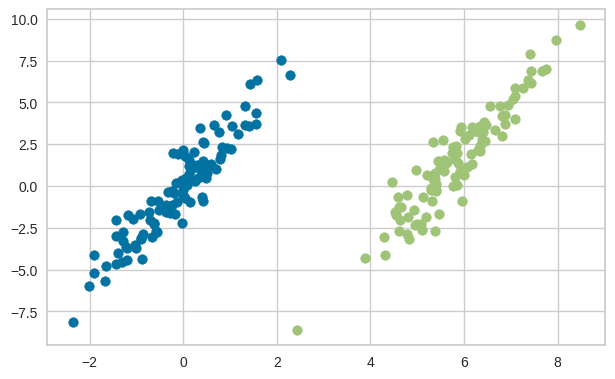

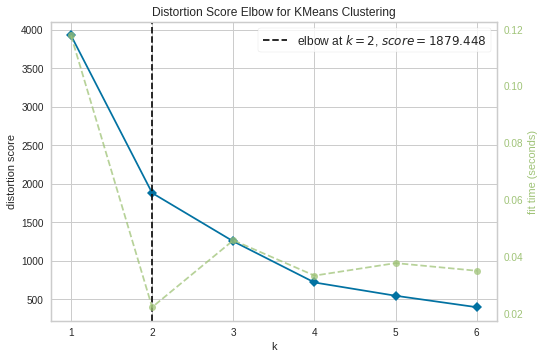

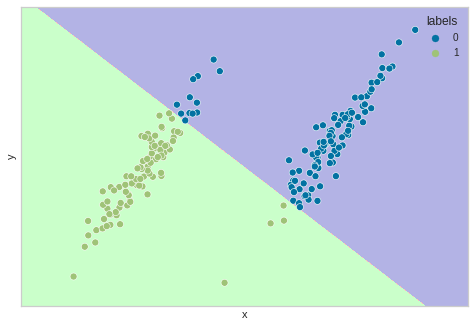

In [130]:
var_x = 1
var_y = 10
cov = 3
theta = 0
mean = [0,0]
R = array([[cos(theta),-sin(theta)],
     [sin(theta),cos(theta)]])
cov_mat = array([[var_x,cov],[cov,var_y]])
cov_mat = R @ cov_mat @ R.T
X = multivariate_normal(mean=mean,cov=cov_mat,size=100)
var_x = 1
var_y = 10
cov = 3
theta = 0
mean = [6,2]
R = array([[cos(theta),-sin(theta)],
     [sin(theta),cos(theta)]])
cov_mat = array([[var_x,cov],[cov,var_y]])
cov_mat = R @ cov_mat @ R.T
Y = multivariate_normal(mean=mean,cov=cov_mat,size=100)
scatter_plot(X,Y)
X = np.concatenate([X,Y])
plt.figure()
kmeans_instance = KMeans()
visualizer = KElbowVisualizer(kmeans_instance, k=(1,7))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
from sklearn.cluster import KMeans
kmeans_instance = KMeans(n_clusters=visualizer.elbow_value_)
model = kmeans_instance.fit(X)
import pandas as pd
df = pd.DataFrame(X,columns=['x','y'])
labels = pd.DataFrame(model.labels_,columns=['labels'])
df = pd.concat([df,labels],axis=1)
import seaborn as sns
sns.scatterplot(data=df,x='x',y='y',hue='labels')
from mglearn.plot_2d_separator import plot_2d_classification
plot_2d_classification(model,X,fill=False,alpha=.3)

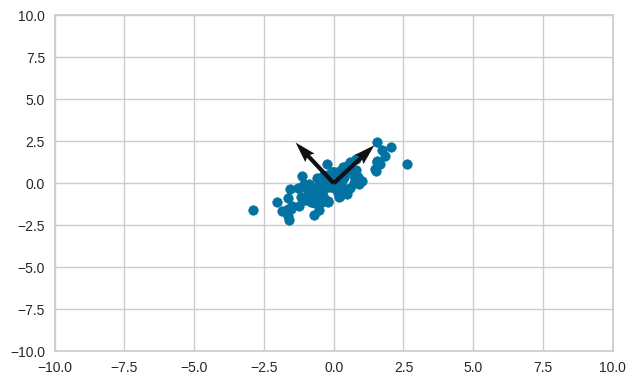

In [178]:
# TODO : code singular value decomposition from scratch without packages
X = multivariate_normal_andrew(var_x=1,var_y=1,cov=.8,theta=0,mean=[0,0])
scatter_plot(X)
plt.xlim(-10,10)
plt.ylim(-10,10)
pca = PCA()
pca.fit(X)
components = pca.components_.T
plt.quiver([0,0],[0,0],components[0],components[1],scale=10)

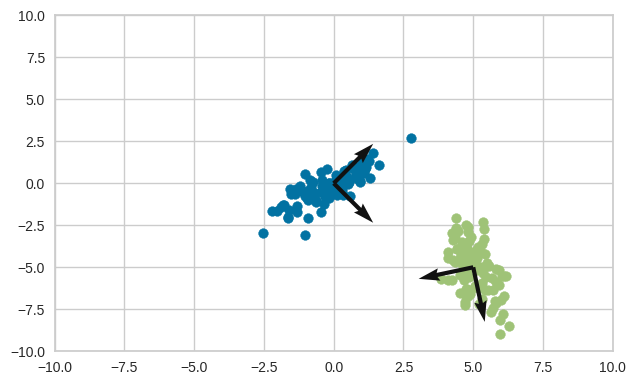

In [190]:
# TODO : code singular value decomposition from scratch without packages
X = multivariate_normal_andrew(var_x=1,var_y=1,cov=.8,theta=0,mean=[0,0])
Y = multivariate_normal_andrew(var_x=1,var_y=1,cov=.8,theta=1,mean=[5,-5])

scatter_plot(X,Y)
plt.xlim(-10,10)
plt.ylim(-10,10)
pca = PCA()
pca.fit(X)
components = pca.components_.T
plt.quiver([0,0],[0,0],components[0],components[1],scale=10)
pca = PCA()
pca.fit(Y)
components = pca.components_.T
plt.quiver([5,5],[-5,-5],components[0],components[1],scale=10)

(-10.0, 10.0)

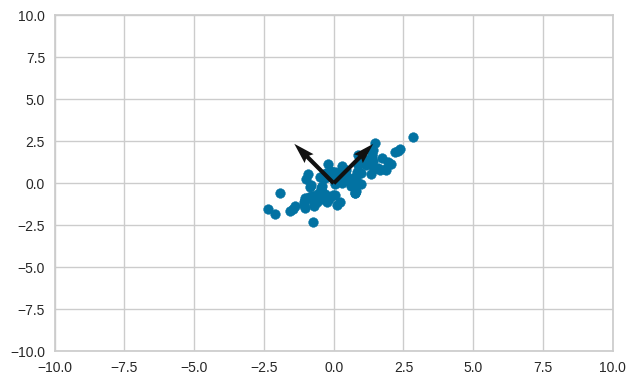

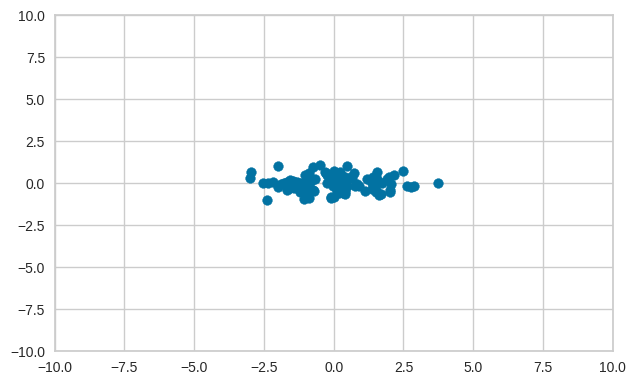

In [192]:
# TODO : code singular value decomposition from scratch without packages
X = multivariate_normal_andrew(var_x=1,var_y=1,cov=.8,theta=0,mean=[0,0])
scatter_plot(X)
plt.xlim(-10,10)
plt.ylim(-10,10)
pca = PCA()
pca.fit(X)
components = pca.components_.T
plt.quiver([0,0],[0,0],components[0],components[1],scale=10)

pca = PCA()
pca.fit(X)
X = pca.transform(X)
scatter_plot(X)
plt.xlim(-10,10)
plt.ylim(-10,10)

(-10.0, 10.0)

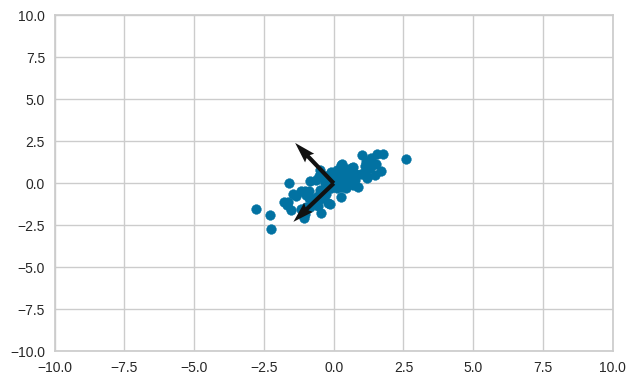

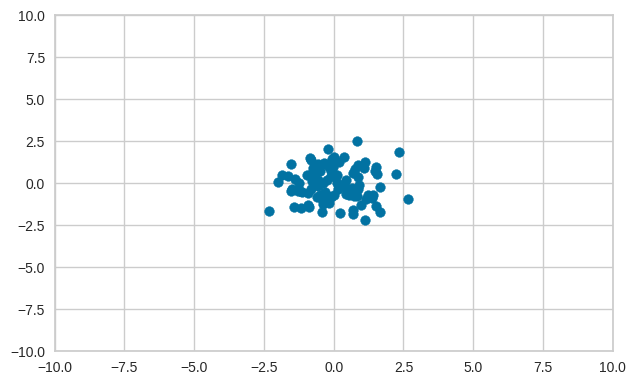

In [212]:
# TODO : code singular value decomposition from scratch without packages
X = multivariate_normal_andrew(var_x=1,var_y=1,cov=.8,theta=0,mean=[0,0])
scatter_plot(X)
plt.xlim(-10,10)
plt.ylim(-10,10)
pca = PCA()
pca.fit(X)
components = pca.components_.T
plt.quiver([0,0],[0,0],components[0],components[1],scale=10)

pca = PCA(whiten=True)
pca.fit(X)
X = pca.transform(X)
scatter_plot(X)
plt.xlim(-10,10)
plt.ylim(-10,10)

Euclidean distance: 2.839399830735627
Mahalanobis distance: 2.6373328010824517
Euclidean distance: 2.839399830735627


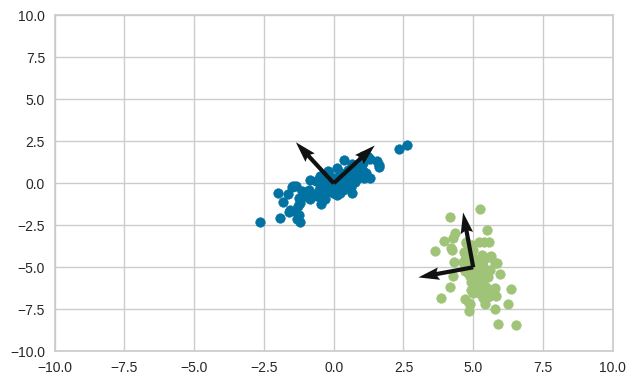

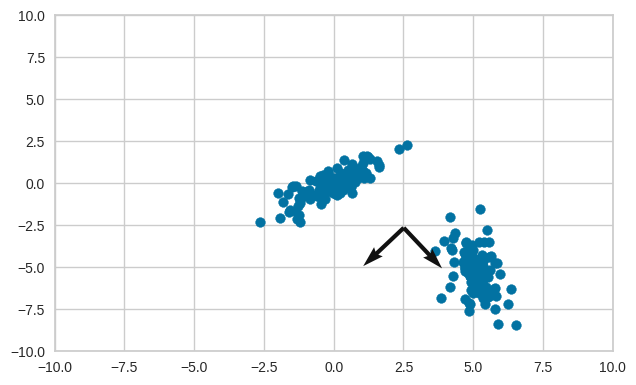

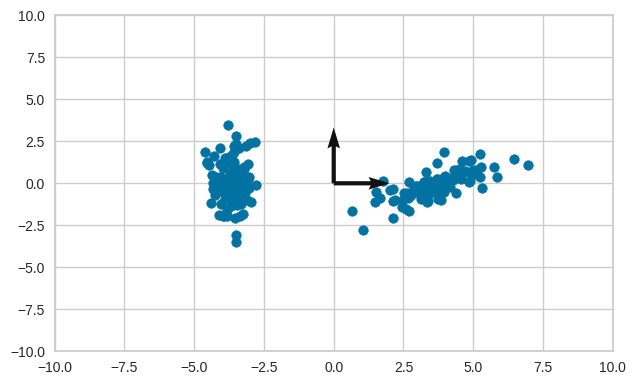

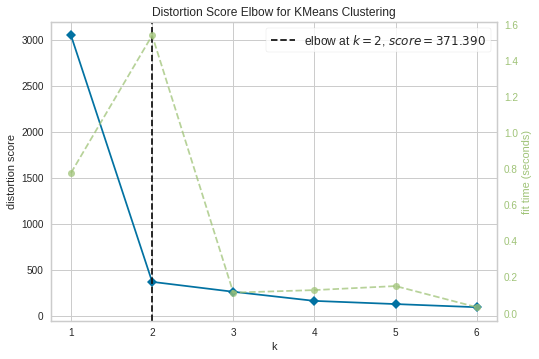

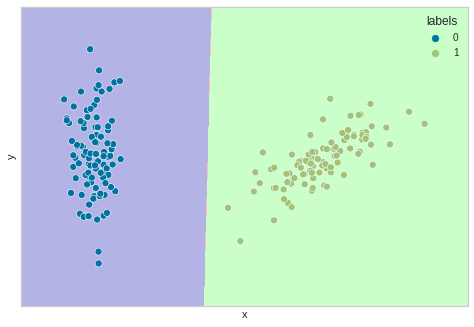

In [218]:
# TODO : code singular value decomposition from scratch without packages
X = multivariate_normal_andrew(var_x=1,var_y=1,cov=.8,theta=0,mean=[0,0])
Y = multivariate_normal_andrew(var_x=1,var_y=1,cov=.8,theta=1,mean=[5,-5])

scatter_plot(X,Y)
plt.xlim(-10,10)
plt.ylim(-10,10)
pca = PCA()
pca.fit(X)
components = pca.components_.T
plt.quiver([0,0],[0,0],components[0],components[1],scale=10)
pca = PCA()
pca.fit(Y)
components = pca.components_.T
plt.quiver([5,5],[-5,-5],components[0],components[1],scale=10)

X = np.concatenate([X,Y])
print('Euclidean distance: '+str(euclidean(X[0],X[1])))
scatter_plot(X)
plt.xlim(-10,10)
plt.ylim(-10,10)
pca = PCA()
pca.fit(X)
components = pca.components_.T
plt.quiver([pca.mean_[0],pca.mean_[0]],[pca.mean_[1],pca.mean_[1]],components[0],components[1],scale=10)

cov = np.cov(X, rowvar=False)
covI = np.linalg.inv(cov)
maha = mahalanobis(X[0], X[1], covI)
print('Mahalanobis distance: '+str(maha))

X = pca.transform(X)
print('Euclidean distance: '+str(euclidean(X[0],X[1])))

pca.fit(X)
components = pca.components_.T

scatter_plot(X)
plt.quiver([pca.mean_[0],pca.mean_[0]],[pca.mean_[1],pca.mean_[1]],components[0],components[1],scale=10)

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.figure()
kmeans_instance = KMeans()
visualizer = KElbowVisualizer(kmeans_instance, k=(1,7))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
from sklearn.cluster import KMeans
kmeans_instance = KMeans(n_clusters=visualizer.elbow_value_)
model = kmeans_instance.fit(X)
import pandas as pd
df = pd.DataFrame(X,columns=['x','y'])
labels = pd.DataFrame(model.labels_,columns=['labels'])
df = pd.concat([df,labels],axis=1)
import seaborn as sns
sns.scatterplot(data=df,x='x',y='y',hue='labels')
from mglearn.plot_2d_separator import plot_2d_classification
plot_2d_classification(model,X,fill=False,alpha=.3)

Euclidean distance: 2.367896067013981
Mahalanobis distance: 2.0754910736827537
Euclidean distance: 2.0754910736827608


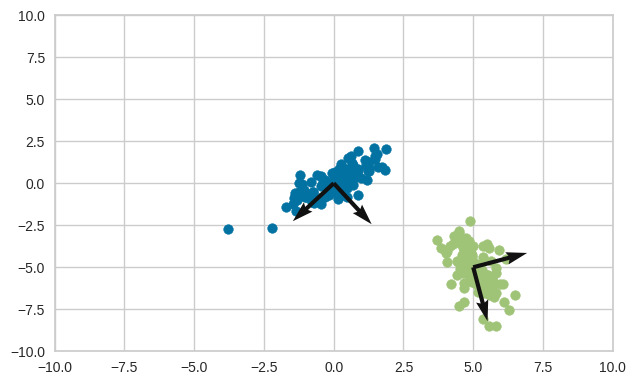

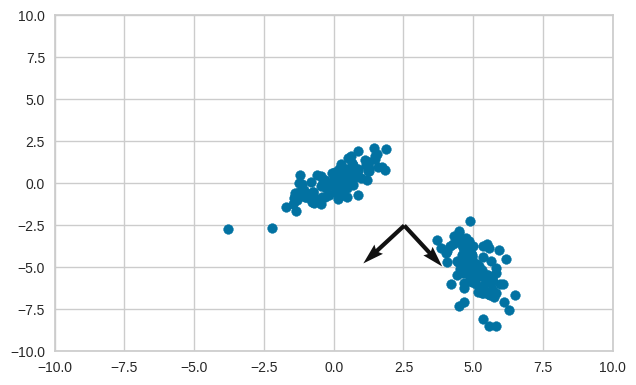

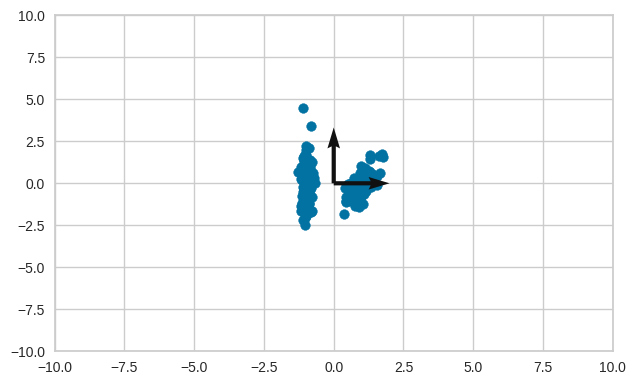

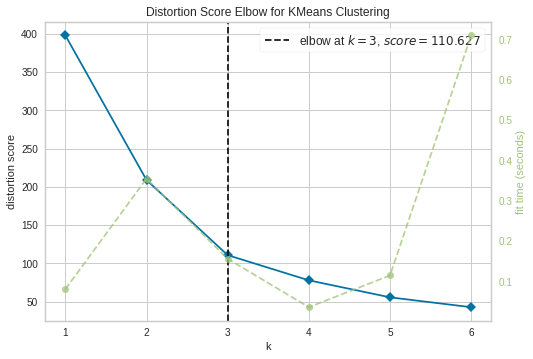

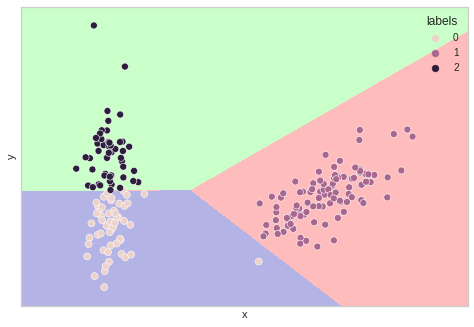

In [219]:
# TODO : code singular value decomposition from scratch without packages
X = multivariate_normal_andrew(var_x=1,var_y=1,cov=.8,theta=0,mean=[0,0])
Y = multivariate_normal_andrew(var_x=1,var_y=1,cov=.8,theta=1,mean=[5,-5])

scatter_plot(X,Y)
plt.xlim(-10,10)
plt.ylim(-10,10)
pca = PCA()
pca.fit(X)
components = pca.components_.T
plt.quiver([0,0],[0,0],components[0],components[1],scale=10)
pca = PCA()
pca.fit(Y)
components = pca.components_.T
plt.quiver([5,5],[-5,-5],components[0],components[1],scale=10)

X = np.concatenate([X,Y])
print('Euclidean distance: '+str(euclidean(X[0],X[1])))
scatter_plot(X)
plt.xlim(-10,10)
plt.ylim(-10,10)
pca = PCA(whiten=True)
pca.fit(X)
components = pca.components_.T
plt.quiver([pca.mean_[0],pca.mean_[0]],[pca.mean_[1],pca.mean_[1]],components[0],components[1],scale=10)

cov = np.cov(X, rowvar=False)
covI = np.linalg.inv(cov)
maha = mahalanobis(X[0], X[1], covI)
print('Mahalanobis distance: '+str(maha))

X = pca.transform(X)
print('Euclidean distance: '+str(euclidean(X[0],X[1])))

pca.fit(X)
components = pca.components_.T

scatter_plot(X)
plt.quiver([pca.mean_[0],pca.mean_[0]],[pca.mean_[1],pca.mean_[1]],components[0],components[1],scale=10)

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.figure()
kmeans_instance = KMeans()
visualizer = KElbowVisualizer(kmeans_instance, k=(1,7))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
from sklearn.cluster import KMeans
kmeans_instance = KMeans(n_clusters=visualizer.elbow_value_)
model = kmeans_instance.fit(X)
import pandas as pd
df = pd.DataFrame(X,columns=['x','y'])
labels = pd.DataFrame(model.labels_,columns=['labels'])
df = pd.concat([df,labels],axis=1)
import seaborn as sns
sns.scatterplot(data=df,x='x',y='y',hue='labels')
from mglearn.plot_2d_separator import plot_2d_classification
plot_2d_classification(model,X,fill=False,alpha=.3)
plt.savefig('out.svg',transparent=True)